In [6]:
# Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# Declare a Base
Base = automap_base()

In [9]:
# Reflect the database tables
Base.prepare(engine, reflect = True)

In [10]:
# Print classes
Base.classes.keys()

['measurements', 'stations']

In [11]:
# Create variables for classes
Measurement = Base.classes.measurements
Station = Base.classes.stations

In [12]:
# Create session
session = Session(engine)

In [13]:
# Query latest date
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [9]:
# Create variable for one year from latest date
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [10]:
# Query date and precipitation for the last year
last_year_rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > last_year\
                                                                  ).order_by(Measurement.date).all()
for data in last_year_rain:
    print(data)

('2016-08-24', 0.08)
('2016-08-24', 2.15)
('2016-08-24', 2.28)
('2016-08-24', 0.0)
('2016-08-24', 1.22)
('2016-08-24', 2.15)
('2016-08-24', 1.45)
('2016-08-25', 0.08)
('2016-08-25', 0.08)
('2016-08-25', 0.0)
('2016-08-25', 0.0)
('2016-08-25', 0.21)
('2016-08-25', 0.06)
('2016-08-25', 0.11)
('2016-08-26', 0.0)
('2016-08-26', 0.03)
('2016-08-26', 0.02)
('2016-08-26', 0.04)
('2016-08-26', 0.0)
('2016-08-26', 0.01)
('2016-08-27', 0.0)
('2016-08-27', 0.18)
('2016-08-27', 0.02)
('2016-08-27', 0.0)
('2016-08-27', 0.12)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.14)
('2016-08-28', 0.6)
('2016-08-28', 2.07)
('2016-08-29', 0.0)
('2016-08-29', 0.17)
('2016-08-29', 0.04)
('2016-08-29', 0.0)
('2016-08-29', 0.0)
('2016-08-29', 0.35)
('2016-08-29', 0.9)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.02)
('2016-08-30', 0.0)
('2016-08-30', 0.0)
('2016-08-30', 0.05)
('2016-08-31', 0.13)
('2016-08-31', 0.1)
('2016-08-31', 0.0)
('2016-08-3

('2017-01-12', 0.0)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-13', 0.0)
('2017-01-14', 0.0)
('2017-01-14', 0.0)
('2017-01-14', 0.0)
('2017-01-14', 0.01)
('2017-01-14', 0.0)
('2017-01-15', 0.0)
('2017-01-15', 0.0)
('2017-01-15', 0.0)
('2017-01-15', 0.0)
('2017-01-15', 0.01)
('2017-01-16', 0.0)
('2017-01-16', 0.0)
('2017-01-16', 0.0)
('2017-01-16', 0.0)
('2017-01-16', 0.0)
('2017-01-16', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-17', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.0)
('2017-01-18', 0.07)
('2017-01-19', 0.0)
('2017-01-19', 0.0)
('2017-01-19', 0.0)
('2017-01-19', 0.0)
('2017-01-19', 0.0)
('2017-01-19', 0.02)
('2017-01-19', 0.0)
('2017-01-20', 0.0)
('2017-01-20', 0.0)
('2017-01-20', 0.0)
('2017-01-20', 0.0)
('2017-01-20', 0.0)
('2017-01-20', 0.0)
('2017-01-20', 0

In [11]:
# Load query results into pandas dataframe
precipitation_df = pd.DataFrame(last_year_rain, columns = ["date", "prcp"])
precipitation_df.set_index("date").head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22


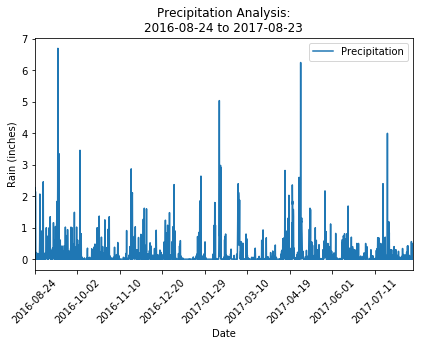

In [12]:
# Plot dataframe
precipitation_df.plot("date", "prcp")

# Graph aesthetics
plt.tight_layout()
plt.title("Precipitation Analysis:\n" 
          "2016-08-24 to 2017-08-23")
plt.legend(["Precipitation"])
plt.xlabel("Date")
plt.ylabel("Rain (inches)")
plt.xticks(rotation=45)

plt.show()

In [13]:
# Summary statistics
precipitation_df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [14]:
# Query total number of stations
station_count = session.query(Station.station).count()
print(f"There are {station_count} weather stations.")

There are 9 weather stations.


In [15]:
# List stations and observations count in descending order 
station_highest_obs = session.query(Measurement.station, func.count(Measurement.tobs)\
                                   ).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()


print("The number of observations for each station are:")
for station, count in station_highest_obs:
    print(station, count)
    
# Print station with highest number of observations
print("")
highest_station = station_highest_obs[0][0]
highest_count = station_highest_obs[0][1]
print(f"Station {highest_station} has the most observations with a observation total of {highest_count}.")

The number of observations for each station are:
USC00519281 2772
USC00519397 2724
USC00513117 2709
USC00519523 2669
USC00516128 2612
USC00514830 2202
USC00511918 1979
USC00517948 1372
USC00518838 511

Station USC00519281 has the most observations with a observation total of 2772.


In [16]:
# Query tobs of station with highest number of observations for the last year
last_12_tobs = session.query(Measurement.tobs).filter((Measurement.date > last_year) & (Measurement.station == highest_station)\
                                                     ).order_by(Measurement.date).all()

for temp in last_12_tobs:
    print(temp)

(77,)
(80,)
(80,)
(75,)
(73,)
(78,)
(77,)
(78,)
(80,)
(80,)
(78,)
(78,)
(78,)
(73,)
(74,)
(80,)
(79,)
(77,)
(80,)
(76,)
(79,)
(75,)
(79,)
(78,)
(79,)
(78,)
(78,)
(76,)
(74,)
(77,)
(78,)
(79,)
(79,)
(77,)
(80,)
(78,)
(78,)
(78,)
(77,)
(79,)
(79,)
(79,)
(79,)
(75,)
(76,)
(73,)
(72,)
(71,)
(77,)
(79,)
(78,)
(79,)
(77,)
(79,)
(77,)
(78,)
(78,)
(78,)
(78,)
(77,)
(74,)
(75,)
(76,)
(73,)
(76,)
(74,)
(77,)
(76,)
(76,)
(74,)
(75,)
(75,)
(75,)
(75,)
(71,)
(63,)
(70,)
(68,)
(67,)
(77,)
(74,)
(77,)
(76,)
(76,)
(75,)
(76,)
(75,)
(73,)
(75,)
(73,)
(75,)
(74,)
(75,)
(74,)
(75,)
(73,)
(75,)
(73,)
(73,)
(74,)
(70,)
(72,)
(70,)
(67,)
(67,)
(69,)
(70,)
(68,)
(69,)
(69,)
(66,)
(65,)
(68,)
(62,)
(75,)
(70,)
(69,)
(76,)
(76,)
(74,)
(73,)
(71,)
(74,)
(74,)
(72,)
(71,)
(72,)
(74,)
(69,)
(67,)
(72,)
(70,)
(64,)
(63,)
(63,)
(62,)
(70,)
(70,)
(62,)
(62,)
(63,)
(65,)
(69,)
(77,)
(70,)
(74,)
(69,)
(72,)
(71,)
(69,)
(71,)
(71,)
(72,)
(72,)
(69,)
(70,)
(66,)
(65,)
(69,)
(68,)
(68,)
(68,)
(59,)
(60,)
(70,)
(73,)
(75,

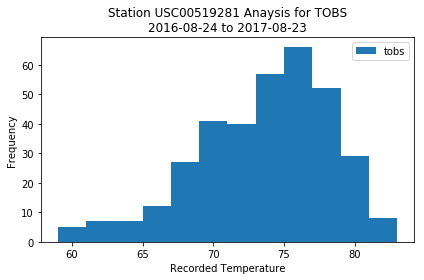

In [17]:
# Plot histogram for tobs data
tobs_df = pd.DataFrame(last_12_tobs)
plt.hist(tobs_df["tobs"], 12)

# Graph aesthetics
plt.legend(["tobs"])
plt.xlabel("Recorded Temperature")
plt.ylabel("Frequency")
plt.title("Station USC00519281 Anaysis for TOBS\n"
            "2016-08-24 to 2017-08-23")
plt.tight_layout()

plt.show()

In [15]:
# Create function to calculate TMIN, TAVG, and TMAX for trip dates
def calc_temps(start_date, end_date):

    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)\
                        ).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [16]:
# Obtain data for dates one year from trip dates
start_trip = dt.date(2018, 4, 10)
end_trip = dt.date(2018, 4, 24)

one_year_ago = dt.timedelta(days=366)
trip_results = (calc_temps((start_trip - one_year_ago), (end_trip - one_year_ago)))

print(trip_results)

[(67, 73.43617021276596, 83)]


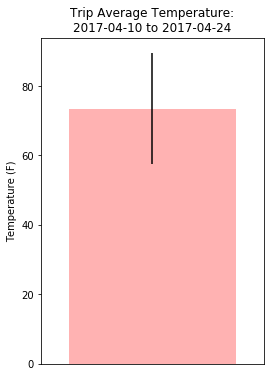

In [17]:
# Plot bar chart with y error bar
trip_avg = trip_results[0][1]
trip_min = trip_results[0][0]
trip_max = trip_results[0][2]

trip_diff = trip_max - trip_min

plt.figure(figsize=(4, 6))
plt.bar(0, trip_avg, color = "red", alpha = 0.3, width = 1.5)

# Graph aesthetics
plt.xlim(-1, 1)
plt.errorbar(0, trip_avg, xerr = None, yerr = trip_diff, color = "black")
plt.tick_params(axis="x", which="both", bottom="off", top="off", labelbottom="off")

plt.title("Trip Average Temperature:\n"
         "2017-04-10 to 2017-04-24")
plt.ylabel("Temperature (F)")

plt.show()